<a href="https://colab.research.google.com/github/mhyubr/JDC2023-DaBesTeam/blob/main/JDC_2023_DaBesTeam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammadayyubramli","key":"f488ccb5002fc72a5ef42353c428920b"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
# !chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets list

In [ ]:
# !kaggle competitions list

In [ ]:
!kaggle competitions download -c penyisihan-joints-data-competition-2023

 86% 14.0M/16.2M [00:01<00:00, 11.1MB/s]
100% 16.2M/16.2M [00:01<00:00, 8.82MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'penyisihan-joints-data-competition-2023.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
BASE_DIR = ""

train_df = pd.read_csv(BASE_DIR + "train.csv", low_memory=False)
test_df = pd.read_csv(BASE_DIR + "test.csv")
submission_df = pd.read_csv(BASE_DIR + "sample_submission.csv")

train_df.drop(columns=['Unnamed: 0'], inplace=True)

# EDA

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        390009 non-null  object 
 1   old_building                    483611 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  object 
 3   height_before_eq (ft)           390009 non-null  float64
 4   land_surface_condition          421209 non-null  object 
 5   type_of_foundation              483611 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            390009 non-null  object 
 8   type_of_other_floor             421209 non-null  object 
 9   position                        410809 non-null  object 
 10  building_plan_configuration     421209 non-null  object 
 11  technical_solution_proposed     46801 non-null   object 
 12  legal_ownership_

In [ ]:
train_df.dtypes

floors_before_eq (total)           object
old_building                      float64
plinth_area (ft^2)                 object
height_before_eq (ft)             float64
land_surface_condition             object
type_of_foundation                 object
type_of_roof                       object
type_of_ground_floor               object
type_of_other_floor                object
position                           object
building_plan_configuration        object
technical_solution_proposed        object
legal_ownership_status             object
has_secondary_use                 float64
type_of_reinforcement_concrete    float64
residential_type                   object
no_family_residing                 object
public_place_type                  object
industrial_use_type                object
govermental_use_type               object
flexible_superstructure            object
wall_binding                      float64
wall_material                     float64
damage_grade                      

In [ ]:
train_df.isna().sum()

floors_before_eq (total)          332806
old_building                      239204
plinth_area (ft^2)                421208
height_before_eq (ft)             332806
land_surface_condition            301606
type_of_foundation                239204
type_of_roof                      421208
type_of_ground_floor              332806
type_of_other_floor               301606
position                          312006
building_plan_configuration       301606
technical_solution_proposed       676014
legal_ownership_status            124802
has_secondary_use                 197604
type_of_reinforcement_concrete    291206
residential_type                  270404
no_family_residing                145602
public_place_type                      0
industrial_use_type               114402
govermental_use_type              249604
flexible_superstructure            62400
wall_binding                       62400
wall_material                     228804
damage_grade                           0
dtype: int64

In [ ]:
train_df.duplicated().sum()

335076

In [ ]:
train_df.shape

(722815, 24)

## Feature Analytic

In [ ]:
train_df.describe(include=['int64', 'float64'])

,old_building,height_before_eq (ft),has_secondary_use,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
count,483611.000000,390009.000000,525211.000000,431609.000000,660415.000000,494011.000000,722815.000000
mean,24.342800,16.047158,0.121279,0.072369,4.266729,1.738795,3.643872
std,64.963571,5.527362,0.326451,0.318483,1.667539,0.646120,1.342427
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.000000,12.000000,0.000000,0.000000,5.000000,2.000000,3.000000
50%,16.000000,16.000000,0.000000,0.000000,5.000000,2.000000,4.000000
75%,27.000000,18.000000,0.000000,0.000000,5.000000,2.000000,5.000000
max,999.000000,99.000000,1.000000,3.000000,7.000000,3.000000,5.000000


In [ ]:
train_df.describe(include=['object'])

,floors_before_eq (total),plinth_area (ft^2),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,building_plan_configuration,technical_solution_proposed,legal_ownership_status,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure
count,390009,301607,421209,483611,301607,390009,421209,410809,421209,46801,598013,452411,577213,722815,608413,473211,660415
unique,47,930,3,12,12,15,11,4,10,4,13,6,11,13,9,3,2
top,Floor two,300 ft^2,Flat,Clay Sand Mixed mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,TImber/Bamboo-Mud,Not attached,Rectangular,Reconstruction,Private,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable
freq,22000,10937,349097,199916,79640,262305,223114,325721,404366,28847,315103,430854,487302,721495,564106,473073,607527


In [ ]:
train_df.nunique(dropna=True)

floors_before_eq (total)           47
old_building                      160
plinth_area (ft^2)                930
height_before_eq (ft)              77
land_surface_condition              3
type_of_foundation                 12
type_of_roof                       12
type_of_ground_floor               15
type_of_other_floor                11
position                            4
building_plan_configuration        10
technical_solution_proposed         4
legal_ownership_status             13
has_secondary_use                   2
type_of_reinforcement_concrete      4
residential_type                    6
no_family_residing                 11
public_place_type                  13
industrial_use_type                 9
govermental_use_type                3
flexible_superstructure             2
wall_binding                        6
wall_material                       4
damage_grade                        5
dtype: int64

In [ ]:
def convert_plinth_area(x):
    if x == 'More than 1000 ft^2':
        return 1000
    elif type(x) == str:
        if 'ft' in x:
            return int(x.split(' ')[0])
    elif type(x) == int:
        return x
    else:
        return np.nan

def convert_floors(x):
    if x in ['1st Story', 'floor one', 'Has 1 floor', 'one story', '1', 'Floor 1', 'floor 1st',
           'one', 'Just 1 floor',]:
        return 1
    elif x in ['floor two', 'Two Floor', 'two', ' just 2 floor', 'There is 2 Floor/Story',
             'Floor two', 'Floor 2', '2', 'two story', 'floor second', '2 floor', ]:
        return 2
    elif x in ['Floor 3', 'Three floor', 'floor third', '3.00', ' has 3 Floor', 'three Story',
             'Floor-three', 'Three', ]:
        return 3
    elif x in ['four Floor', ' has Four fl', 'Fl four', '4', 'Floor 4', 'floor four', 'Four Story',
             'Four', ]:
        return 4
    elif x in ['fifth', 'Fl Five', '5', 'Floor Fifth', 'five Floor', ' Has Five fl', 'Has Five fl']:
        return 5
    elif x in ['6']:
        return 6
    elif x in ['7']:
        return 7
    elif x in ['8']:
        return 8
    elif x in ['9']:
        return 9
    else:
        return x

def convert_foundation(x):
    value_map = {
        'Bamboo or Timber': 'Bamboo/Timber',
        'Bamboo/TImber': 'Bamboo/Timber',
        'Clay Sand Mixed mortar-Stone/Brick': 'Clay mortar-Stone/Brick',
        'Cement-Stone or Cement-Brick': 'Cement-Stone/Brick',
        'RC': 'Reinforced Concrete',
        'Other': 'Others'
    }

    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_roof(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Bamboo/Timber Light roof': 'Bamboo/Timber Light roof',
        'Wood Light Roof or Bamboo Heavy Roof': 'Wood/Bamboo Light/Heavy roof',
        'Wood Light Roof or Bamboo Light Roof': 'Wood/Bamboo Light/Heavy roof',
        'Bamboo or Timber Light roof': 'Bamboo/Timber Light roof',
        'Bamboo/TImber-Light Roof': 'Bamboo/Timber Light roof',
        'Reinforced Brick Slab/rcc/rbc': 'Reinforced Brick Slab/rcc/rbc',
        'Bamboo/Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'reinforced cement concrete/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Bamboo or Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'Bamboo/TImber-Heavy Roof': 'Bamboo/Timber Heavy roof',
        'rcc/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Reinforced brick concrete/rcc/rbc': 'Reinforced cement concrete/rb/rbc'
    }

    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_gfloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Clay': 'Clay',
        'Mud': 'Mud',
        'Brick or Stone': 'Brick/Stone',
        'Reinforced Concrete': 'Reinforced Concrete',
        'mud': 'Mud',
        'reinforced concrete': 'Reinforced Concrete',
        'RC': 'Reinforced Concrete',
        'soil, water, loam Mixed': 'Soil/Loam/Water Mixed',
        'brick/stone': 'Brick/Stone',
        'Other': 'Other',
        'Lumber': 'Lumber',
        'Brick/Stone': 'Brick/Stone',
        'TImber': 'Timber',
        'Timber': 'Timber',
        'Wood': 'Lumber' # Grouping Wood and Lumber together
    }

    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value

def convert_ofloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'TImber/Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Wood-Mud or Bamboo Mud': 'Wood/Bamboo-Mud',
        'Timber Mud or Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Not applicable': 'Other',
        'Wood or Bamboo Mud': 'Wood/Bamboo-Mud',
        'rcc/rb/rbc': 'RCC/RB/RBC',
        'Wood-Plank': 'Wood-Plank',
        'Timber-Planck': 'Timber-Plank',
        'Lumber-plank': 'Wood-Plank',
        'Reinforced brick concrete/rcc/rbc': 'RCC/RB/RBC',
        'reinforced cement concrete/rb/rbc': 'RCC/RB/RBC'
    }

    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value

def convert_status(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Private Use': 'Private',
        'Private': 'Private',
        'Prvt': 'Private',
        'Privste': 'Private',
        'Public Space': 'Public',
        'Public': 'Public',
        'Unknown': 'Unknown',
        'Public Use': 'Public',
        'Institutionals': 'Institutional',
        'Unspecified': 'Unknown',
        'Institutional Use': 'Institutional',
        'Other': 'Other',
        'Institutional': 'Institutional'
    }

    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_residing(x):
    if x == 'None':
        return 0
    elif type(x) == str:
        return int(float(x))
    else:
        return x

In [ ]:
train_clean = train_df.copy()

train_clean['floors_before_eq (total)'] = train_df['floors_before_eq (total)'].apply(convert_floors)
train_clean['plinth_area (ft^2)'] = train_df['plinth_area (ft^2)'].apply(convert_plinth_area)
train_clean['type_of_foundation'] = train_df['type_of_foundation'].apply(convert_foundation)
train_clean['type_of_roof'] = train_df['type_of_roof'].apply(convert_roof)
train_clean['type_of_ground_floor'] = train_df['type_of_ground_floor'].apply(convert_gfloor)
train_clean['type_of_other_floor'] = train_df['type_of_other_floor'].apply(convert_ofloor)
train_clean['legal_ownership_status'] = train_df['legal_ownership_status'].apply(convert_status)
train_clean['no_family_residing'] = train_df['no_family_residing'].apply(convert_residing)

train_clean.head()

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2.0,1.0,256.0,22.0,Flat,Bamboo/Timber,Bamboo/Timber Light roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,3.0,3.0,985.0,18.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
2,2.0,7.0,NaN,14.0,Flat,Mud mortar-Stone/Brick,NaN,Clay,Wood/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
3,2.0,18.0,185.0,15.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0
4,2.0,22.0,290.0,17.0,Flat,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,1.0


In [ ]:
numerik = train_clean.select_dtypes(include=['int64', 'float64'])
kategorik = train_clean.select_dtypes(include=['object'])

In [ ]:
numerik_columns = numerik.columns
print(numerik.columns)
print(len(numerik.columns))

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)', 'has_secondary_use',
       'type_of_reinforcement_concrete', 'no_family_residing', 'wall_binding',
       'wall_material', 'damage_grade'],
      dtype='object')
10


In [ ]:
kategorik_columns = kategorik.columns
print(kategorik.columns)
print(len(kategorik.columns))

Index(['land_surface_condition', 'type_of_foundation', 'type_of_roof',
       'type_of_ground_floor', 'type_of_other_floor', 'position',
       'building_plan_configuration', 'technical_solution_proposed',
       'legal_ownership_status', 'residential_type', 'public_place_type',
       'industrial_use_type', 'govermental_use_type',
       'flexible_superstructure'],
      dtype='object')
14


In [ ]:
# fig, axes = plt.subplots(4, 3, figsize=(12, 14))
# fig.suptitle('Numerik Data Distribution\n\n')

# sns.boxplot(train_clean, x=numerik_columns[0], ax=axes[0,0], color='r')
# axes[0,0].set_title(numerik_columns[0])

# sns.boxplot(train_clean, x=numerik_columns[1], ax=axes[0,1], color='y')
# axes[0,1].set_title(numerik_columns[1])

# sns.boxplot(train_clean, x=numerik_columns[2], ax=axes[0,2], color='g')
# axes[0,2].set_title(numerik_columns[2])

# sns.boxplot(train_clean, x=numerik_columns[3], ax=axes[1,0], color='b')
# axes[1,0].set_title(numerik_columns[3])

# sns.boxplot(train_clean, x=numerik_columns[4], ax=axes[1,1], color='k')
# axes[1,1].set_title(numerik_columns[4])

# sns.boxplot(train_clean, x=numerik_columns[5], ax=axes[1,2], color='c')
# axes[1,2].set_title(numerik_columns[5])

# sns.boxplot(train_clean, x=numerik_columns[6], ax=axes[2,0], color='m')
# axes[2,1].set_title(numerik_columns[6])

# sns.boxplot(train_clean, x=numerik_columns[7], ax=axes[2,1], color='m')
# axes[2,1].set_title(numerik_columns[7])

# sns.boxplot(train_clean, x=numerik_columns[8], ax=axes[2,2], color='m')
# axes[2,2].set_title(numerik_columns[8])

# sns.boxplot(train_clean, x=numerik_columns[9], ax=axes[3,1], color='m')
# axes[3,1].set_title(numerik_columns[9])


# fig.delaxes(axes[3,0])
# fig.delaxes(axes[3,2])

# plt.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(4, 3, figsize=(12, 14))
# fig.suptitle('Numerik Data Distribution\n\n')

# sns.histplot(train_clean, x=numerik_columns[0], kde=True, ax=axes[0,0], color='r')
# axes[0,0].set_title(numerik_columns[0])

# sns.histplot(train_clean, x=numerik_columns[1], kde=True, ax=axes[0,1], color='y')
# axes[0,1].set_title(numerik_columns[1])

# sns.histplot(train_clean, x=numerik_columns[2], kde=True, ax=axes[0,2], color='g')
# axes[0,2].set_title(numerik_columns[2])

# sns.histplot(train_clean, x=numerik_columns[3], kde=True, ax=axes[1,0], color='b')
# axes[1,0].set_title(numerik_columns[3])

# sns.histplot(train_clean, x=numerik_columns[4], kde=True, ax=axes[1,1], color='k')
# axes[1,1].set_title(numerik_columns[4])

# sns.histplot(train_clean, x=numerik_columns[5], kde=True, ax=axes[1,2], color='c')
# axes[1,2].set_title(numerik_columns[5])

# sns.histplot(train_clean, x=numerik_columns[6], kde=True, ax=axes[2,0], color='m')
# axes[2,1].set_title(numerik_columns[6])

# sns.histplot(train_clean, x=numerik_columns[7], kde=True, ax=axes[2,1], color='m')
# axes[2,1].set_title(numerik_columns[7])

# sns.histplot(train_clean, x=numerik_columns[8], kde=True, ax=axes[2,2], color='m')
# axes[2,2].set_title(numerik_columns[8])

# sns.histplot(train_clean, x=numerik_columns[9], kde=True, ax=axes[3,1], color='m')
# axes[3,1].set_title(numerik_columns[9])


# fig.delaxes(axes[3,0])
# fig.delaxes(axes[3,2])

# plt.tight_layout()
# plt.show()

In [ ]:
train_clean[['type_of_reinforcement_concrete', 'wall_binding', 'wall_material', 'damage_grade']]

,type_of_reinforcement_concrete,wall_binding,wall_material,damage_grade
0,0.0,0.0,0.0,1.0
1,0.0,5.0,2.0,5.0
2,0.0,5.0,2.0,5.0
3,0.0,5.0,2.0,4.0
4,0.0,5.0,2.0,1.0
...,...,...,...,...
722810,0.0,1.0,0.0,4.0
722811,0.0,5.0,2.0,5.0
722812,0.0,5.0,1.0,5.0
722813,0.0,5.0,2.0,5.0


Text(0.5, 1.0, '\nKorelasi Data Numerik\n')

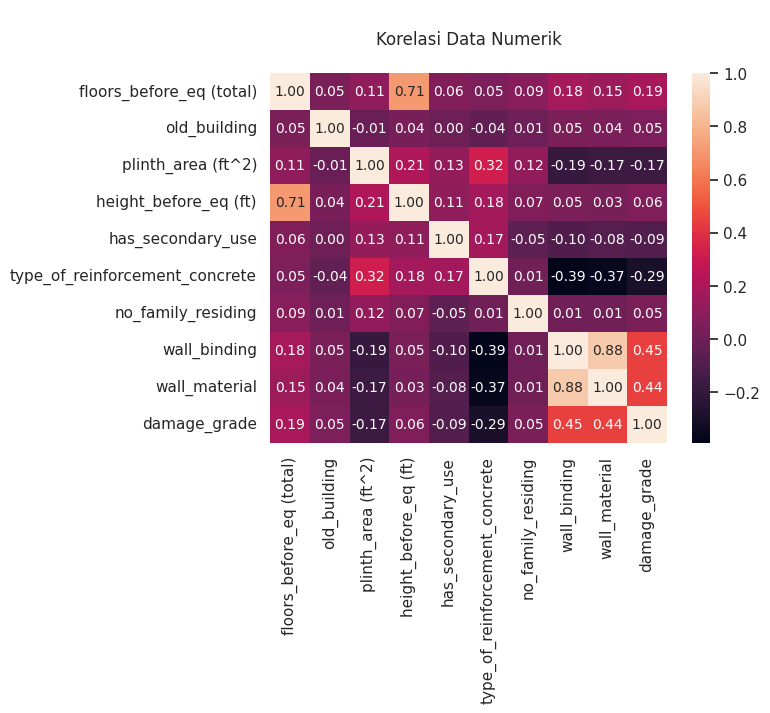

In [ ]:
sns.heatmap(
    numerik.corr(),
    annot=True,
    fmt='.2f',
    annot_kws={'fontsize': 10}
)

plt.title('\nKorelasi Data Numerik\n')
# sns.set(font_scale=3)
# plt.subplots_adjust(top=0.92, bottom=0.08, left=0.12, right=0.95)


## Target Analysis

In [ ]:
train_clean['damage_grade'].value_counts()

5.0    261631
4.0    174337
3.0    129242
2.0     83011
1.0     74594
Name: damage_grade, dtype: int64

<Axes: xlabel='damage_grade', ylabel='count'>

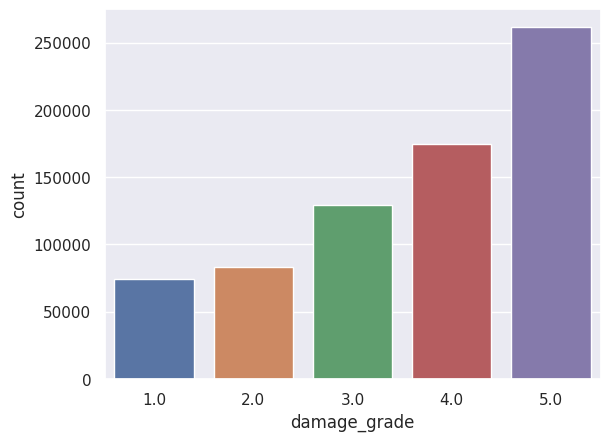

In [ ]:
sns.countplot(train_clean, x='damage_grade')

In [ ]:
# sns.jointplot(x='wall_binding',y='damage_grade',data=train_clean,kind='reg')

# Preprocessing

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

In [ ]:
def convert_plinth_area(x):
    if x == 'More than 1000 ft^2':
        return 1000
    elif type(x) == str:
        if 'ft' in x:
            return int(x.split(' ')[0])
    elif type(x) == int:
        return x
    else:
        return np.nan

def convert_floors(x):
    if x in ['1st Story', 'floor one', 'Has 1 floor', 'one story', '1', 'Floor 1', 'floor 1st',
           'one', 'Just 1 floor',]:
        return 1
    elif x in ['floor two', 'Two Floor', 'two', ' just 2 floor', 'There is 2 Floor/Story',
             'Floor two', 'Floor 2', '2', 'two story', 'floor second', '2 floor', ]:
        return 2
    elif x in ['Floor 3', 'Three floor', 'floor third', '3.00', ' has 3 Floor', 'three Story',
             'Floor-three', 'Three', ]:
        return 3
    elif x in ['four Floor', ' has Four fl', 'Fl four', '4', 'Floor 4', 'floor four', 'Four Story',
             'Four', ]:
        return 4
    elif x in ['fifth', 'Fl Five', '5', 'Floor Fifth', 'five Floor', ' Has Five fl', 'Has Five fl']:
        return 5
    elif x in ['6']:
        return 6
    elif x in ['7']:
        return 7
    elif x in ['8']:
        return 8
    elif x in ['9']:
        return 9
    else:
        return x

def convert_foundation(x):
    value_map = {
        'Bamboo or Timber': 'Bamboo/Timber',
        'Bamboo/TImber': 'Bamboo/Timber',
        'Clay Sand Mixed mortar-Stone/Brick': 'Clay mortar-Stone/Brick',
        'Cement-Stone or Cement-Brick': 'Cement-Stone/Brick',
        'RC': 'Reinforced Concrete',
        'Other': 'Others'
    }

    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_roof(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Bamboo/Timber Light roof': 'Bamboo/Timber Light roof',
        'Wood Light Roof or Bamboo Heavy Roof': 'Wood/Bamboo Light/Heavy roof',
        'Wood Light Roof or Bamboo Light Roof': 'Wood/Bamboo Light/Heavy roof',
        'Bamboo or Timber Light roof': 'Bamboo/Timber Light roof',
        'Bamboo/TImber-Light Roof': 'Bamboo/Timber Light roof',
        'Reinforced Brick Slab/rcc/rbc': 'Reinforced Brick Slab/rcc/rbc',
        'Bamboo/Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'reinforced cement concrete/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Bamboo or Timber Heavy roof': 'Bamboo/Timber Heavy roof',
        'Bamboo/TImber-Heavy Roof': 'Bamboo/Timber Heavy roof',
        'rcc/rb/rbc': 'Reinforced cement concrete/rb/rbc',
        'Reinforced brick concrete/rcc/rbc': 'Reinforced cement concrete/rb/rbc'
    }

    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_gfloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Clay': 'Clay',
        'Mud': 'Mud',
        'Brick or Stone': 'Brick/Stone',
        'Reinforced Concrete': 'Reinforced Concrete',
        'mud': 'Mud',
        'reinforced concrete': 'Reinforced Concrete',
        'RC': 'Reinforced Concrete',
        'soil, water, loam Mixed': 'Soil/Loam/Water Mixed',
        'brick/stone': 'Brick/Stone',
        'Other': 'Other',
        'Lumber': 'Lumber',
        'Brick/Stone': 'Brick/Stone',
        'TImber': 'Timber',
        'Timber': 'Timber',
        'Wood': 'Lumber' # Grouping Wood and Lumber together
    }

    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value

def convert_ofloor(value):
    # Create a dictionary to map similar values to their group
    value_map = {
        'TImber/Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Wood-Mud or Bamboo Mud': 'Wood/Bamboo-Mud',
        'Timber Mud or Bamboo-Mud': 'Timber/Bamboo-Mud',
        'Not applicable': 'Other',
        'Wood or Bamboo Mud': 'Wood/Bamboo-Mud',
        'rcc/rb/rbc': 'RCC/RB/RBC',
        'Wood-Plank': 'Wood-Plank',
        'Timber-Planck': 'Timber-Plank',
        'Lumber-plank': 'Wood-Plank',
        'Reinforced brick concrete/rcc/rbc': 'RCC/RB/RBC',
        'reinforced cement concrete/rb/rbc': 'RCC/RB/RBC'
    }

    # Replace similar values with their group
    if value in value_map:
        return value_map[value]
    else:
        return value

def convert_status(x):
    # Create a dictionary to map similar values to their group
    value_map = {
        'Private Use': 'Private',
        'Private': 'Private',
        'Prvt': 'Private',
        'Privste': 'Private',
        'Public Space': 'Public',
        'Public': 'Public',
        'Unknown': 'Unknown',
        'Public Use': 'Public',
        'Institutionals': 'Institutional',
        'Unspecified': 'Unknown',
        'Institutional Use': 'Institutional',
        'Other': 'Other',
        'Institutional': 'Institutional'
    }

    # Replace similar values with their group
    if x in value_map:
        return value_map[x]
    else:
        return x

def convert_residing(x):
    if x == 'None':
        return 0
    elif type(x) == str:
        return int(float(x))
    else:
        return x

In [ ]:
train_model = train_df.copy()

train_model['floors_before_eq (total)'] = train_df['floors_before_eq (total)'].apply(convert_floors)
train_model['plinth_area (ft^2)'] = train_df['plinth_area (ft^2)'].apply(convert_plinth_area)
train_model['type_of_foundation'] = train_df['type_of_foundation'].apply(convert_foundation)
train_model['type_of_roof'] = train_df['type_of_roof'].apply(convert_roof)
train_model['type_of_ground_floor'] = train_df['type_of_ground_floor'].apply(convert_gfloor)
train_model['type_of_other_floor'] = train_df['type_of_other_floor'].apply(convert_ofloor)
train_model['legal_ownership_status'] = train_df['legal_ownership_status'].apply(convert_status)
train_model['no_family_residing'] = train_df['no_family_residing'].apply(convert_residing)

train_model.head(2)

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
0,2.0,1.0,256.0,22.0,Flat,Bamboo/Timber,Bamboo/Timber Light roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,0.0,0.0,1.0
1,3.0,3.0,985.0,18.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0


### duplicate

In [ ]:
print(train_df.duplicated().sum())
print(train_df.shape)

train_df_ndup = train_df.drop_duplicates(inplace=False)

print(train_df_ndup.duplicated().sum())
print(train_df_ndup.shape)

335076
(722815, 24)
0
(387739, 24)


### missing value

In [ ]:
train_no_nan = train_df_ndup.dropna(inplace=False, axis=0)
train_no_nan.shape

(46799, 24)

In [ ]:
train_clean = train_no_nan.copy()

train_clean['floors_before_eq (total)'] = train_df['floors_before_eq (total)'].apply(convert_floors)
train_clean['plinth_area (ft^2)'] = train_df['plinth_area (ft^2)'].apply(convert_plinth_area)
train_clean['type_of_foundation'] = train_df['type_of_foundation'].apply(convert_foundation)
train_clean['type_of_roof'] = train_df['type_of_roof'].apply(convert_roof)
train_clean['type_of_ground_floor'] = train_df['type_of_ground_floor'].apply(convert_gfloor)
train_clean['type_of_other_floor'] = train_df['type_of_other_floor'].apply(convert_ofloor)
train_clean['legal_ownership_status'] = train_df['legal_ownership_status'].apply(convert_status)
train_clean['no_family_residing'] = train_df['no_family_residing'].apply(convert_residing)

train_clean.head(2)

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
21,1.0,22.0,300.0,10.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Mud,Other,Not attached,...,0.0,Non-residential,0.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
27,3.0,22.0,360.0,18.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0


In [ ]:
print(train_clean['floors_before_eq (total)'].unique())
print(train_clean['has_secondary_use'].unique())
print(train_clean['type_of_reinforcement_concrete'].unique())
print(train_clean['no_family_residing'].unique())
print(train_clean['wall_binding'].unique())
print(train_clean['wall_material'].unique())
print(train_clean['damage_grade'].unique())

[1. 3. 2. 4. 6. 5. 7.]
[0. 1.]
[0. 2. 1. 3.]
[0. 1. 2. 3. 4. 5. 6. 8. 7.]
[5. 0. 2. 1. 7. 3.]
[2. 0. 1. 3.]
[5. 4. 2. 3. 1.]


In [ ]:
numeric_to_categoric = ['has_secondary_use',
                        'type_of_reinforcement_concrete',
                        'no_family_residing',
                        'wall_binding',
                        'wall_material'
                        ]
drop_num = ['damage_grade'] + numeric_to_categoric

pd.Index(numeric_to_categoric)

Index(['has_secondary_use', 'type_of_reinforcement_concrete',
       'no_family_residing', 'wall_binding', 'wall_material'],
      dtype='object')

In [ ]:
numeric_data = train_clean.select_dtypes(include=['int64', 'float64']).drop(drop_num, axis=1)
categoric_data = train_clean.select_dtypes(include=['object'])

numeric_columns = numeric_data.columns
print(numeric_columns)
print(len(numeric_columns))

categoric_columns = categoric_data.columns | pd.Index(numeric_to_categoric)
print(categoric_columns)
print(len(categoric_columns))

Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)'],
      dtype='object')
4
Index(['building_plan_configuration', 'flexible_superstructure',
       'govermental_use_type', 'has_secondary_use', 'industrial_use_type',
       'land_surface_condition', 'legal_ownership_status',
       'no_family_residing', 'position', 'public_place_type',
       'residential_type', 'technical_solution_proposed', 'type_of_foundation',
       'type_of_ground_floor', 'type_of_other_floor',
       'type_of_reinforcement_concrete', 'type_of_roof', 'wall_binding',
       'wall_material'],
      dtype='object')
19


<ipython-input-40-24fc4fb1d6ca>:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  categoric_columns = categoric_data.columns | pd.Index(numeric_to_categoric)


In [ ]:
high_cardinal = pd.Index([col for col in categoric_columns if train_clean[col].nunique() > 5])
low_cardinal = pd.Index([col for col in categoric_columns if col not in high_cardinal])

In [ ]:
class IsolationForestTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, contamination=0.05, random_state=42):
        self.contamination = contamination
        self.random_state = random_state
        self.model = IsolationForest(contamination=self.contamination)

    def fit(self, X, y=None):
        self.model.fit(X)
        return self

    def transform(self, X):
        mask = self.model.predict(X) != -1
        return X[mask]

def handle_outliers(X):
    Q1 = np.quantile(X, 0.25, axis=0)
    Q3 = np.quantile(X, 0.75, axis=0)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X_clipped = np.clip(X, lower_bound, upper_bound)
    return X_clipped

### outliers

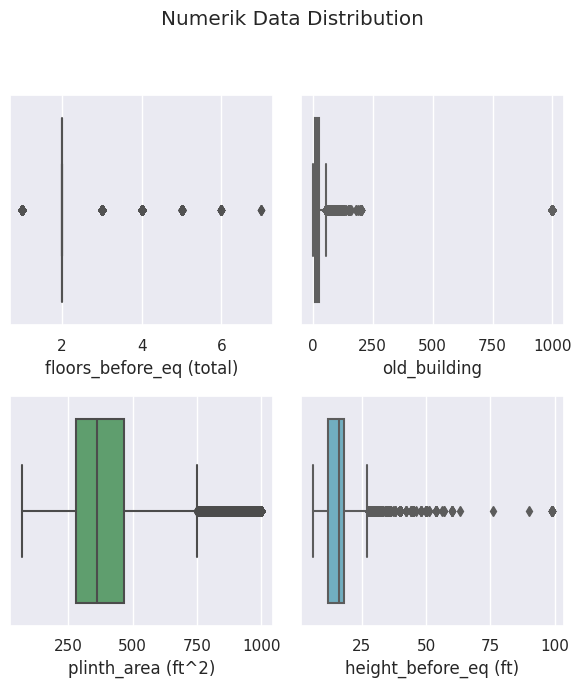

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 7))
fig.suptitle('Numerik Data Distribution\n\n')

sns.boxplot(train_clean, x=numeric_columns[0], ax=axes[0,0], color='r')
sns.boxplot(train_clean, x=numeric_columns[1], ax=axes[0,1], color='y')
sns.boxplot(train_clean, x=numeric_columns[2], ax=axes[1,0], color='g')
sns.boxplot(train_clean, x=numeric_columns[3], ax=axes[1,1], color='c')

# fig.delaxes(axes[3,0])
# fig.delaxes(axes[3,2])

plt.tight_layout()
plt.show()

In [ ]:
def IsolFor(data):
  # Membuat model Isolation Forest
  iso = IsolationForest(contamination=0.05)

  data = data[numeric_columns]
  # Fitting model dengan data
  iso.fit(data)

  # Menentukan outlier
  outliers = iso.predict(data) == -1
  data_no_outliers = data[~outliers]
  return data_no_outliers

In [ ]:
train_no_out = IsolFor(train_clean)

print(len(train_no_out))
print(len(IsolFor(train_no_out)))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


44459


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


42236


In [ ]:
train_clean.shape, train_no_out.shape

((46799, 24), (44459, 4))

In [ ]:
train_clean.isna().sum()

floors_before_eq (total)          0
old_building                      0
plinth_area (ft^2)                0
height_before_eq (ft)             0
land_surface_condition            0
type_of_foundation                0
type_of_roof                      0
type_of_ground_floor              0
type_of_other_floor               0
position                          0
building_plan_configuration       0
technical_solution_proposed       0
legal_ownership_status            0
has_secondary_use                 0
type_of_reinforcement_concrete    0
residential_type                  0
no_family_residing                0
public_place_type                 0
industrial_use_type               0
govermental_use_type              0
flexible_superstructure           0
wall_binding                      0
wall_material                     0
damage_grade                      0
dtype: int64

In [ ]:
train_clean.drop(columns=numeric_columns, inplace=True)
train_clean = pd.concat([train_no_out, train_clean], axis=1)
train_clean.dropna(inplace=True)
train_clean.head(2)

,floors_before_eq (total),old_building,plinth_area (ft^2),height_before_eq (ft),land_surface_condition,type_of_foundation,type_of_roof,type_of_ground_floor,type_of_other_floor,position,...,type_of_reinforcement_concrete,residential_type,no_family_residing,public_place_type,industrial_use_type,govermental_use_type,flexible_superstructure,wall_binding,wall_material,damage_grade
21,1.0,22.0,300.0,10.0,Moderate slope,Clay mortar-Stone/Brick,Bamboo/Timber Light roof,Mud,Other,Not attached,...,0.0,Non-residential,0.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,5.0
27,3.0,22.0,360.0,18.0,Flat,Clay mortar-Stone/Brick,Wood/Bamboo Light/Heavy roof,Clay,Timber/Bamboo-Mud,Not attached,...,0.0,Non-residential,1.0,Non-public,Non-industrial,Non-govermental,unavailable,5.0,2.0,4.0


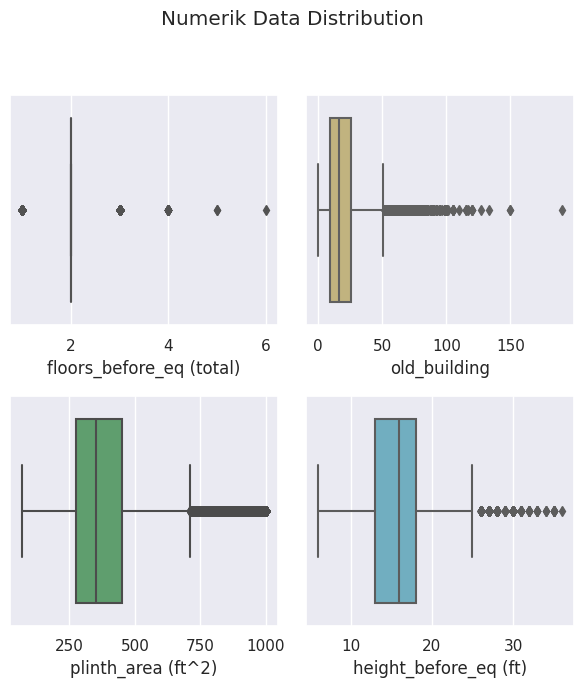

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(6, 7))
fig.suptitle('Numerik Data Distribution\n\n')

sns.boxplot(train_clean, x=numeric_columns[0], ax=axes[0,0], color='r')
sns.boxplot(train_clean, x=numeric_columns[1], ax=axes[0,1], color='y')
sns.boxplot(train_clean, x=numeric_columns[2], ax=axes[1,0], color='g')
sns.boxplot(train_clean, x=numeric_columns[3], ax=axes[1,1], color='c')

# fig.delaxes(axes[3,0])
# fig.delaxes(axes[3,2])

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
train_model = train_df.copy()

train_model['floors_before_eq (total)'] = train_df['floors_before_eq (total)'].apply(convert_floors)
train_model['plinth_area (ft^2)'] = train_df['plinth_area (ft^2)'].apply(convert_plinth_area)
train_model['type_of_foundation'] = train_df['type_of_foundation'].apply(convert_foundation)
train_model['type_of_roof'] = train_df['type_of_roof'].apply(convert_roof)
train_model['type_of_ground_floor'] = train_df['type_of_ground_floor'].apply(convert_gfloor)
train_model['type_of_other_floor'] = train_df['type_of_other_floor'].apply(convert_ofloor)
train_model['legal_ownership_status'] = train_df['legal_ownership_status'].apply(convert_status)
train_model['no_family_residing'] = train_df['no_family_residing'].apply(convert_residing)

print(train_model['floors_before_eq (total)'].unique())
print(train_model['has_secondary_use'].unique())
print(train_model['type_of_reinforcement_concrete'].unique())
print(train_model['no_family_residing'].unique())
print(train_model['wall_binding'].unique())
print(train_model['wall_material'].unique())
print(train_model['damage_grade'].unique())

[ 2.  3. nan  1.  5.  4.  6.  8.  9.  7.]
[ 0. nan  1.]
[ 0. nan  2.  1.  3.]
[ 1. nan  0.  2.  3.  4.  7.  5.  6.  9.  8. 11.]
[ 0.  5. nan  2.  1.  7.  3.]
[ 0.  2. nan  1.  3.]
[1. 5. 4. 2. 3.]


In [ ]:
numeric_to_categoric = ['has_secondary_use',
                        'type_of_reinforcement_concrete',
                        'no_family_residing',
                        'wall_binding',
                        'wall_material'
                        ]
drop_num = ['damage_grade'] + numeric_to_categoric

pd.Index(numeric_to_categoric)

Index(['has_secondary_use', 'type_of_reinforcement_concrete',
       'no_family_residing', 'wall_binding', 'wall_material'],
      dtype='object')

In [ ]:
numeric_data = train_model.select_dtypes(include=['int64', 'float64']).drop(drop_num, axis=1)
categoric_data = train_model.select_dtypes(include=['object'])

numeric_columns = numeric_data.columns
# print(numeric_columns)
# print(len(numeric_columns))

categoric_columns = categoric_data.columns | pd.Index(numeric_to_categoric)
# print(categoric_columns)
# print(len(categoric_columns))

high_cardinal = pd.Index([col for col in categoric_columns if train_model[col].nunique() > 5])
low_cardinal = pd.Index([col for col in categoric_columns if col not in high_cardinal])
# print(high_cardinal)
# print(low_cardinal)


print('Numeric Columns:')
print(list(numeric_columns))
print('\nHigh Card Columns:')
print(list(high_cardinal))
print('\nLow Cardinal Columns:')
print(list(low_cardinal))

<ipython-input-73-788031b4d0ba>:8: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  categoric_columns = categoric_data.columns | pd.Index(numeric_to_categoric)


Numeric Columns:
['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)', 'height_before_eq (ft)']

High Card Columns:
['building_plan_configuration', 'industrial_use_type', 'no_family_residing', 'public_place_type', 'residential_type', 'type_of_foundation', 'type_of_ground_floor', 'type_of_other_floor', 'wall_binding']

Low Cardinal Columns:
['flexible_superstructure', 'govermental_use_type', 'has_secondary_use', 'land_surface_condition', 'legal_ownership_status', 'position', 'technical_solution_proposed', 'type_of_reinforcement_concrete', 'type_of_roof', 'wall_material']


<Axes: xlabel='damage_grade', ylabel='count'>

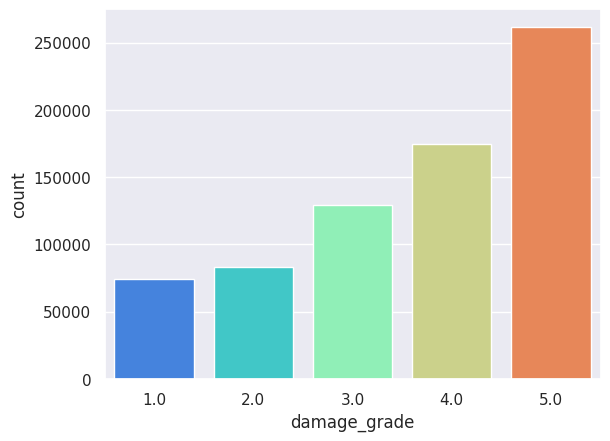

In [ ]:
sns.countplot(x='damage_grade', data=train_model, palette='rainbow')

In [ ]:
train_model.damage_grade.value_counts()

5.0    261631
4.0    174337
3.0    129242
2.0     83011
1.0     74594
Name: damage_grade, dtype: int64

In [ ]:
# from sklearn.utils import resample

# class1 = resample(train_model[train_model['damage_grade'] == 1.0],
#                                  replace=True,
#                                  n_samples=74594,
#                                  random_state=42)

# class2 = resample(train_model[train_model['damage_grade'] == 2.0],
#                                  replace=True,
#                                  n_samples=83011,
#                                  random_state=42)

# class3 = resample(train_model[train_model['damage_grade'] == 3.0],
#                                  replace=True,
#                                  n_samples=129242,
#                                  random_state=42)

# class4 = resample(train_model[train_model['damage_grade'] == 4.0],
#                                  replace=True,
#                                  n_samples=174337,
#                                  random_state=42)

# class5 = resample(train_model[train_model['damage_grade'] == 5.0],
#                                  replace=True,
#                                  n_samples=129242,
#                                  random_state=42)


# # Gabung ulang
# train_model = pd.concat([class1, class2, class3, class4, class5])

# train_model.damage_grade.value_counts()

In [ ]:
# sns.countplot(x='damage_grade', data=train_model, palette='rainbow')

# Preprocessor Pipeline

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import FunctionTransformer, LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from category_encoders.target_encoder import TargetEncoder
from category_encoders import CatBoostEncoder

## Function

In [ ]:
def duplicate(df):
  return df.drop_duplicates(inplace=False)

def missing_value(df):
  return df.dropna(inplace=False, axis=0)

def IsolFor(df):
  # Membuat model Isolation Forest
  iso = IsolationForest(contamination=0.05)

  # Fitting model dengan data
  df_numeric = df[numeric_columns]
  iso.fit(df_numeric)

  # Menentukan outlier
  outliers = iso.predict(df_numeric) == -1
  df_no_outliers = df_numeric[~outliers]

  # Menggabungkan data kembali
  df2 = df.copy()
  df2.drop(columns=numeric_columns, inplace=True)
  df2 = pd.concat([df_no_outliers, df2], axis=1)
  df2.dropna(inplace=True)
  return df2

In [ ]:
print(train_model.shape)
print(IsolFor(missing_value(duplicate(train_model))).shape)

(722815, 24)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


(44290, 24)


## Pipeline

In [ ]:
set_config(display='diagram')

In [ ]:
duplicate_droper = FunctionTransformer(duplicate)
handling_missing_value = FunctionTransformer(missing_value)
outlier_isolator = FunctionTransformer(IsolFor)

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
constant_imputer = SimpleImputer(strategy='constant', fill_value=-1, add_indicator=True)
onehot_oncoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
label_encoder = LabelEncoder()
catboost_encoder = CatBoostEncoder()

In [ ]:
# numerical_pipeline = Pipeline([
#     ('imputer', median_imputer),
# ])

# low_card_pipeline = Pipeline([
#     ('imputer', mode_imputer),
# ])

# high_card_pipeline = Pipeline([
#     ('imputer', mode_imputer),
# ])

# imputed_data = ColumnTransformer([
#     ('numeric', numerical_pipeline, numeric_columns),
#     ('low_cardinal', low_card_pipeline, low_cardinal),
#     ('high_cardinal', high_card_pipeline, high_cardinal),
# ])

# imputed_data

In [ ]:
data_cleaner = Pipeline([
    ('duplicate_droper', FunctionTransformer(duplicate)),
    ('handling_missing_value', FunctionTransformer(missing_value)),
    ('outlier_isolator', FunctionTransformer(IsolFor)),
])

data_cleaner

Pipeline(steps=[('duplicate_droper',
                 FunctionTransformer(func=<function duplicate at 0x7f8afcb3e200>)),
                ('handling_missing_value',
                 FunctionTransformer(func=<function missing_value at 0x7f8afcb3e7a0>)),
                ('outlier_isolator',
                 FunctionTransformer(func=<function IsolFor at 0x7f8afcb3dea0>))])

In [ ]:
# fixed_data = Pipeline([
#     ('imputed_data', imputed_data),
#     ('data_cleaner', data_cleaner),
# ])

# fixed_data

In [ ]:
numerical_pipeline = Pipeline([
    # ('imputer', median_imputer),
    ('scaler', minmax_scaler),
])

low_card_pipeline = Pipeline([
    # ('imputer', mode_imputer),
    ('low_cardinal', onehot_oncoder),
])

high_card_pipeline = Pipeline([
    # ('imputer', mode_imputer),
    ('high_cardinal', ordinal_encoder),
    # ('high_cardinal', TargetEncoder),
    # ('high_cardinal', OrdinalEncoder),
])

preprocessor = ColumnTransformer([
    ('numeric', numerical_pipeline, numeric_columns),
    ('low_cardinal', low_card_pipeline, low_cardinal),
    ('high_cardinal', high_card_pipeline, high_cardinal),
])

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 Index(['floors_before_eq (total)', 'old_building', 'plinth_area (ft^2)',
       'height_before_eq (ft)'],
      dtype='object')),
                                ('low_cardinal',
                                 Pipeline(steps=[('low_cardinal',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['flexible_superstructure', 'govermental_use_type', 'has_sec...
      dtype='object')),
                                ('high_cardinal',
                                 Pipeline(steps=[('high_cardinal',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1))]),
                                 Index(['building_plan_configuration', 'industrial_use_type',
       'no_family_residing', 'public_place_type', 'residential_type',
       'type_of_foundation', 'type_of_ground_floor', 'type_of_other_floor',
       'wall_binding'],
      dtype='object'))])

# Model Pipeline

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier, plot_importance
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.utils import class_weight
# regression metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, f1_score
# classification metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
train_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722815 entries, 0 to 722814
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   floors_before_eq (total)        390009 non-null  float64
 1   old_building                    483611 non-null  float64
 2   plinth_area (ft^2)              301607 non-null  float64
 3   height_before_eq (ft)           390009 non-null  float64
 4   land_surface_condition          421209 non-null  object 
 5   type_of_foundation              483611 non-null  object 
 6   type_of_roof                    301607 non-null  object 
 7   type_of_ground_floor            390009 non-null  object 
 8   type_of_other_floor             421209 non-null  object 
 9   position                        410809 non-null  object 
 10  building_plan_configuration     421209 non-null  object 
 11  technical_solution_proposed     46801 non-null   object 
 12  legal_ownership_

In [ ]:
# train_model.drop(['old_building', 'height_before_eq (ft)', 'has_secondary_use', 'no_family_residing'], axis=1, inplace=True)

In [ ]:
train_model_clean = data_cleaner.fit_transform(train_model)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
X = train_model_clean.drop(['damage_grade'], axis=1)
y = train_model_clean['damage_grade']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((35432, 23), (8858, 23), (35432,), (8858,))

In [ ]:
y_train = LabelEncoder().fit_transform(y_train)
y_val = LabelEncoder().fit_transform(y_val)

## KNN

In [ ]:
# params = {
#     'n_neighbors': 5,
#     'weights': 'uniform',
#     'metric': 'euclidean',
#     'algorithm': 'kd_tree',
#     'leaf_size': 30,
#     'p': 3,
#     'n_jobs': -1
# }

# knn_pipeline = Pipeline([
#     ('prep', preprocessor),
#     ('estimator', KNeighborsClassifier(**params))
# ])

# knn_pipeline

In [ ]:
# knn_pipeline.fit(X_train, y_train)

# print('Score:', knn_pipeline.score(X_val, y_val))

# y_pred = knn_pipeline.predict(X_val)

In [ ]:
# print(classification_report(y_val, y_pred))

# ax = plt.subplot()

# sns.heatmap(
#     confusion_matrix(y_val, y_pred),
#     annot=True,
#     fmt='.0f',
#     annot_kws={'fontsize': 10},
#     cmap='Blues',
#     xticklabels=np.arange(1, 6),
#     yticklabels=np.arange(1, 6),
#     ax=ax)

# ax.set_title('\nConfusion Matrix (KNN)\n')
# ax.set_xlabel('\nPredicted labels\n', color='r')
# ax.set_ylabel('\nTrue labels\n', color='g')

# plt.show()

In [ ]:
# param_grid = {
#     'estimator__n_neighbors': np.arange(1, 11),
#     'estimator__weights': ['uniform', 'distance'],
#     'estimator__metric': ['euclidean', 'manhattan', 'minkowski'],
#     'estimator__algorithm': ['kd_tree', 'ball_tree'],
#     'estimator__leaf_size': [10, 20, 30, 40, 50],
#     'estimator__p': [1, 2, 3],
#     'estimator__n_jobs': [-1]
# }

# grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

# y_pred = knn_pipeline.predict(X_val)

# print(classification_report(y_val, y_pred))

# sns.heatmap(
#     confusion_matrix(y_val, y_pred),
#     annot=True,
#     fmt='.2f',
#     annot_kws={'fontsize': 10},
#     cmap='Blues')

## XGBoost

In [ ]:
# params = {
#     'learning_rate':0.1,
#     'max_depth':3,
#     'n_estimators':100,
#     'objective':'multi:softmax',
#     'num_class':3,
#     'gamma':0,
#     'subsample':0.8,
#     'colsample_bytree':0.8,
#     'seed':42
# }

# xgb_pipeline = Pipeline([
#     ('prep', preprocessor),
#     ('estimator', XGBClassifier(**params))
# ])

# xgb_pipeline

In [ ]:
# xgb_pipeline.fit(X_train, y_train)

# print('Score:', xgb_pipeline.score(X_val, y_val))

# y_pred = xgb_pipeline.predict(X_val)

In [ ]:
# print(classification_report(y_val, y_pred))

# ax = plt.subplot()

# sns.heatmap(
#     confusion_matrix(y_val, y_pred),
#     annot=True,
#     fmt='.0f',
#     annot_kws={'fontsize': 10},
#     cmap='Blues',
#     xticklabels=np.arange(1, 6),
#     yticklabels=np.arange(1, 6),
#     ax=ax)

# ax.set_title('\nConfusion Matrix (XGBoost)\n')
# ax.set_xlabel('\nPredicted labels\n', color='r')
# ax.set_ylabel('\nTrue labels\n', color='g')

# plt.show()

## SVM

In [ ]:
# params = {
#     'C': 1.0,
#     'kernel': 'rbf',
#     'degree': 3,
#     'gamma': 'scale',
#     'coef0': 0.0,
#     'shrinking': True,
#     'probability': False,
#     'tol': 1e-3,
#     'max_iter': -1
# }

# svc_estimator = SVC(C= 1.0, kernel= 'rbf', degree= 3, gamma= 'scale', coef0= 0.0, shrinking= True, probability= False, tol= 1e-3, max_iter= -1, verbose=True)

# svm_pipeline = Pipeline([
#     ('prep', preprocessor),
#     ('estimator', svc_estimator)
# ])

# svm_pipeline

In [ ]:
# svm_pipeline.fit(X_train, y_train)

# print('Score:', svm_pipeline.score(X_val, y_val))

# y_pred = svm_pipeline.predict(X_val)

In [ ]:
# print(classification_report(y_val, y_pred))

# ax = plt.subplot()

# sns.heatmap(
#     confusion_matrix(y_val, y_pred),
#     annot=True,
#     fmt='.0f',
#     annot_kws={'fontsize': 10},
#     cmap='Blues',
#     xticklabels=np.arange(1, 6),
#     yticklabels=np.arange(1, 6),
#     ax=ax)

# ax.set_title('\nConfusion Matrix (SVM)\n')
# ax.set_xlabel('\nPredicted labels\n', color='r')
# ax.set_ylabel('\nTrue labels\n', color='g')

# plt.show()

In [ ]:
# svm_param_grid = {
#               'estimator__C': [0.1, 1, 10],
#               'estimator__kernel': ['linear', 'rbf', 'poly'],
#               'estimator__degree': [2, 3, 4],
#               'estimator__gamma': ['scale', 'auto']
#               }

# svm_grid_search = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, verbose=1, n_jobs=-1)

In [ ]:
# svm_grid_search.fit(X_train, y_train)

# print('Best parameters:', svm_grid_search.best_params_)
# print('Best score:', svm_grid_search.best_score_)

# Stacking

## Stacking Ensemble

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# estimators = []

# stack = StackingCVClassifier(
#     classifiers=estimators,
#     meta_classifier=lr_pipeline,
#     cv=5,
#     random_state=42,
#     verbose=1
# )

## Stacking AutoGluon

In [ ]:
!pip install autogluon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:
X_train.shape, y_train.shape

((35432, 23), (35432,))

In [ ]:
train_autgluon, val_autogluon = train_test_split(train_model_clean, test_size=0.2, random_state=42)
X_val_autogluon = val_autogluon.drop(['damage_grade'], axis=1, inplace=False)
y_val_autogluon = val_autogluon['damage_grade']
train_autgluon.shape, val_autogluon.shape, X_val_autogluon.shape, y_val_autogluon.shape

((35432, 24), (8858, 24), (8858, 23), (8858,))

In [ ]:
predictor = TabularPredictor(
    label='damage_grade',
    problem_type='multiclass',
    verbosity=3,
    eval_metric='accuracy'
    )

stacking_paramater = {
    'time_limit': 10*60,
    'presets': 'best_quality',
    # 'tuning_data': X_val_autogluon,
    'auto_stack': True,
    'hyperparameters': 'very_light',
    # 'hyperparameters': {'NN_TORCH': {'num_epochs': 2}, 'GBM': {'num_boost_round': 20}},
    'excluded_model_types': ['FASTAI']
}

stacking_predictor = predictor.fit(train_autgluon, **stacking_paramater)

No path specified. Models will be saved in: "AutogluonModels/ag-20230516_194402/"
Presets specified: ['best_quality']
============ fit kwarg info ============
User Specified kwargs:
{'auto_stack': True, 'excluded_model_types': ['FASTAI']}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': True,
 'calibrate': 'auto',
 'excluded_model_types': ['FASTAI'],
 'feature_generator': 'auto',
 'feature_prune_kwargs': None,
 'holdout_frac': None,
 'hyperparameter_tune_kwargs': None,
 'keep_only_best': False,
 'name_suffix': None,
 'num_bag_folds': None,
 'num_bag_sets': None,
 'num_stack_levels': None,
 'pseudo_data': None,
 'refit_full': False,
 'save_space': False,
 'set_best_to_refit_full': False,
 'unlabeled_data': None,
 'use_bag_holdout': False,
 'verbosity': 3}
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Saving AutogluonModels/ag-20230516_

In [ ]:
stacking_predictor.get_model_names()

['LightGBMXT_BAG_L1',
 'LightGBM_BAG_L1',
 'CatBoost_BAG_L1',
 'XGBoost_BAG_L1',
 'WeightedEnsemble_L2',
 'LightGBMXT_BAG_L2',
 'LightGBM_BAG_L2',
 'CatBoost_BAG_L2',
 'XGBoost_BAG_L2',
 'WeightedEnsemble_L3']

In [ ]:
stacking_predictor.leaderboard(
    silent=True,
    data=val_autogluon,
    extra_metrics=['accuracy', 'log_loss']
)

Loading: AutogluonModels/ag-20230516_194402/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/XGBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/CatBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/XGBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L3/model.pkl


,model,score_test,accuracy,log_loss,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM_BAG_L2,0.674644,0.674644,-0.838228,0.667814,6.190750,7.794945,446.417011,0.879108,1.707739,64.173795,2,True,7
1,LightGBMXT_BAG_L1,0.672161,0.672161,-0.782804,0.667532,2.572763,2.290632,84.167797,2.572763,2.290632,84.167797,1,True,1
2,XGBoost_BAG_L1,0.672048,0.672048,-0.823940,0.666290,1.035179,0.780585,43.405223,1.035179,0.780585,43.405223,1,True,4
3,XGBoost_BAG_L2,0.671935,0.671935,-1.500160,0.663637,5.803743,7.218159,401.840675,0.492101,1.130953,19.597459,2,True,9
4,LightGBMXT_BAG_L2,0.671935,0.671935,-0.790271,0.667843,6.768559,8.605359,450.469168,1.456918,2.518153,68.225952,2,True,6
5,WeightedEnsemble_L3,0.671822,0.671822,-0.790728,0.667899,7.655231,10.322027,517.950929,0.007564,0.008929,3.307966,3,True,10
6,LightGBM_BAG_L1,0.671371,0.671371,-0.755140,0.668181,1.490184,2.425984,56.824178,1.490184,2.425984,56.824178,1,True,2
7,WeightedEnsemble_L2,0.671371,0.671371,-0.755140,0.668181,1.495893,2.431976,59.597211,0.005709,0.005992,2.773034,2,True,5
8,CatBoost_BAG_L1,0.664033,0.664033,-0.902946,0.659799,0.213515,0.590004,197.846018,0.213515,0.590004,197.846018,1,True,3
9,CatBoost_BAG_L2,0.660759,0.660759,-1.447768,0.657682,5.473638,6.731704,421.122077,0.161996,0.644498,38.878860,2,True,8


In [ ]:
!pip install bokeh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stacking_predictor.fit_summary(verbosity=3, show_plot=True)

Loading: AutogluonModels/ag-20230516_194402/models/LightGBMXT_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/CatBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/XGBoost_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBMXT_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/CatBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/XGBoost_BAG_L2/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L3/model.pkl


*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBM_BAG_L1   0.668181       2.425984   56.824178                2.425984          56.824178            1       True          2
1  WeightedEnsemble_L2   0.668181       2.431976   59.597211                0.005992           2.773034            2       True          5
2  WeightedEnsemble_L3   0.667899      10.322027  517.950929                0.008929           3.307966            3       True         10
3    LightGBMXT_BAG_L2   0.667843       8.605359  450.469168                2.518153          68.225952            2       True          6
4      LightGBM_BAG_L2   0.667814       7.794945  446.417011                1.707739          64.173795            2       True          7
5    LightGBMXT_BAG_L1   0.667532       2.290632   84.167797                2.290632          84.167797 

{'model_types': {'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBMXT_BAG_L1': 0.6675321743057123,
  'LightGBM_BAG_L1': 0.6681813050349966,
  'CatBoost_BAG_L1': 0.6597990517046738,
  'XGBoost_BAG_L1': 0.6662903589975163,
  'WeightedEnsemble_L2': 0.6681813050349966,
  'LightGBMXT_BAG_L2': 0.6678426281327613,
  'LightGBM_BAG_L2': 0.6678144050575751,
  'CatBoost_BAG_L2': 0.6576823210657033,
  'XGBoost_BAG_L2': 0.6636373899300068,
  'WeightedEnsemble_L3': 0.6678990742831339},
 'model_best': 'WeightedEnsemb

In [ ]:
# stacking_predictor.feature_importance(val_autogluon)

In [ ]:
pred_autogluon = stacking_predictor.predict(val_autogluon)

Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L2/model.pkl


In [ ]:
pred_autogluon

73004     4.0
184800    3.0
97993     5.0
180003    3.0
233715    5.0
         ... 
259115    1.0
368551    5.0
84598     5.0
223348    2.0
159904    5.0
Name: damage_grade, Length: 8858, dtype: float64

In [ ]:
pred_autogluon_proba = stacking_predictor.predict_proba(val_autogluon)

Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L2/model.pkl


In [ ]:
pred_autogluon_proba.head()

,1.0,2.0,3.0,4.0,5.0
73004,0.008790,0.020801,0.066676,0.484577,0.419156
184800,0.005375,0.073468,0.779638,0.125207,0.016312
97993,0.007112,0.012277,0.127475,0.411037,0.442099
180003,0.004987,0.037471,0.765606,0.176935,0.015001
233715,0.005840,0.009341,0.046597,0.302384,0.635839


In [ ]:
evaluate_predictor = stacking_predictor.evaluate(val_autogluon)

Loading: AutogluonModels/ag-20230516_194402/models/LightGBM_BAG_L1/model.pkl
Loading: AutogluonModels/ag-20230516_194402/models/WeightedEnsemble_L2/model.pkl
Evaluation: accuracy on test data: 0.6713705125310454
Evaluations on test data:
{
    "accuracy": 0.6713705125310454,
    "balanced_accuracy": 0.6683301661124041,
    "mcc": 0.5765111416711295
}


# Submission

In [ ]:
# submission_df.head(2)

In [ ]:
# submission_df.shape

In [ ]:
# test_df.info()

In [ ]:
# test_model = data_cleaner.fit_transform(test_df)

In [ ]:
# test_pred = stacking_predictor.predict(test_model)

In [ ]:
# submission = pd.Dataframe()

In [ ]:
# submission.to_csv('submission.csv', index=False)